In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Specify the experiment directory (update this to your experiment timestamp)
# Find latest experiment: !ls -td fio_io/2*/ | head -1
experiment_dir = 'fio_io/20251004_235057'  # Update this path

# Read the CSV file from the experiment directory
df = pd.read_csv(f'{experiment_dir}/fio_io_bandwidth.csv')
df.head()

,timestamp,workload,threads,bs,iodepth,ioengine,size,runtime,read_bw_bytes,write_bw_bytes,total_bw_bytes,read_bw_mib_s,write_bw_mib_s,total_bw_mib_s,json_path
0,20251004_235057,randrw,1,64k,1,psync,10G,60,154635775,154888080,309523855,147.472167,147.712784,295.184951,logs/fio_io/20251004_235057/randrw_threads1.json
1,20251004_235057,randrw,2,64k,1,psync,10G,60,229463926,229669268,459133194,218.833853,219.029682,437.863535,logs/fio_io/20251004_235057/randrw_threads2.json
2,20251004_235057,randrw,4,64k,1,psync,10G,60,301607806,301732318,603340124,287.635618,287.754362,575.389980,logs/fio_io/20251004_235057/randrw_threads4.json
3,20251004_235057,randrw,8,64k,1,psync,10G,60,375361907,374447740,749809647,357.973010,357.101192,715.074203,logs/fio_io/20251004_235057/randrw_threads8.json
4,20251004_235057,randrw,12,64k,1,psync,10G,60,415592148,416022479,831614627,396.339558,396.749953,793.089511,logs/fio_io/20251004_235057/randrw_threads12.json


In [3]:
# Calculate per-thread bandwidth
df['per_thread_bw_mib_s'] = df['total_bw_mib_s'] / df['threads']

# Display the data
print(df[['threads', 'total_bw_mib_s', 'per_thread_bw_mib_s']])

   threads  total_bw_mib_s  per_thread_bw_mib_s
0        1      295.184951           295.184951
1        2      437.863535           218.931767
2        4      575.389980           143.847495
3        8      715.074203            89.384275
4       12      793.089511            66.090793


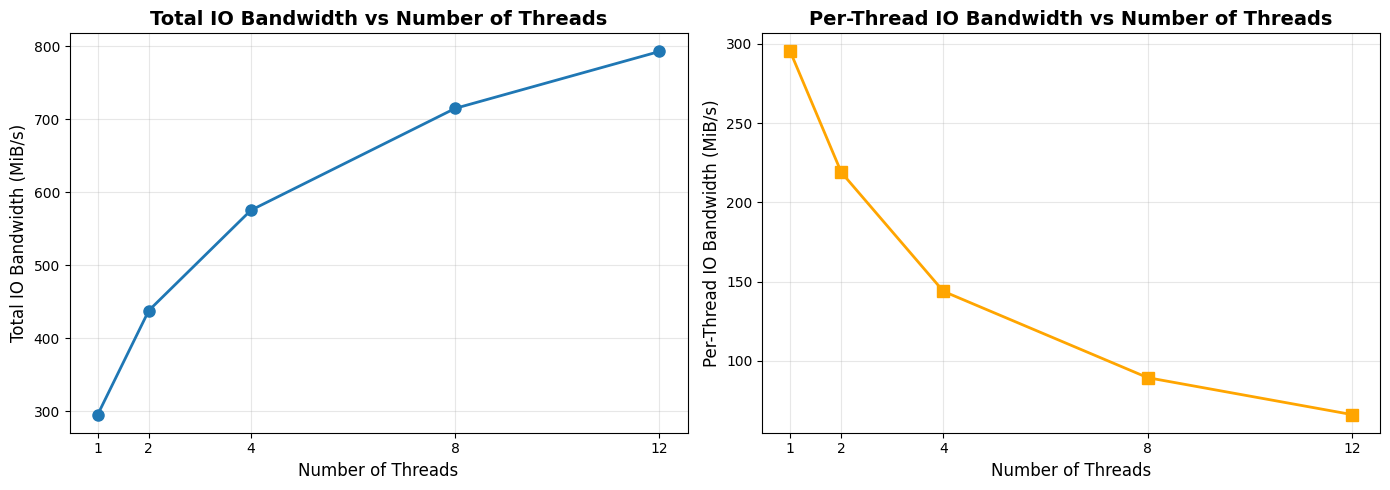

In [4]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Total IO Bandwidth
ax1.plot(df['threads'], df['total_bw_mib_s'], marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Threads', fontsize=12)
ax1.set_ylabel('Total IO Bandwidth (MiB/s)', fontsize=12)
ax1.set_title('Total IO Bandwidth vs Number of Threads', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(df['threads'])

# Plot 2: Per-Thread Bandwidth
ax2.plot(df['threads'], df['per_thread_bw_mib_s'], marker='s', color='orange', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Threads', fontsize=12)
ax2.set_ylabel('Per-Thread IO Bandwidth (MiB/s)', fontsize=12)
ax2.set_title('Per-Thread IO Bandwidth vs Number of Threads', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(df['threads'])

plt.tight_layout()
plt.show()

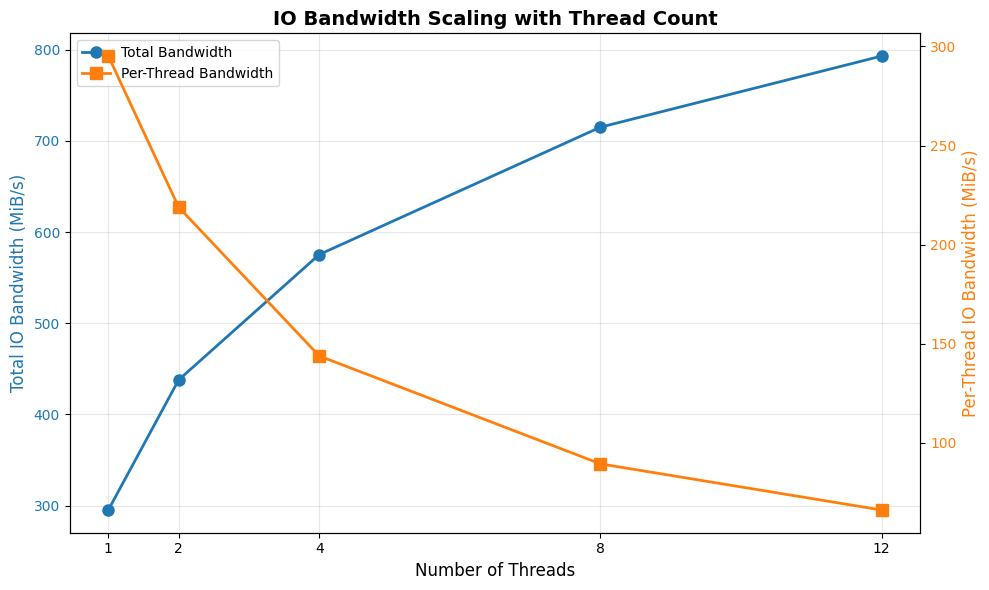

In [5]:
# Combined plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total bandwidth on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Threads', fontsize=12)
ax1.set_ylabel('Total IO Bandwidth (MiB/s)', color=color, fontsize=12)
line1 = ax1.plot(df['threads'], df['total_bw_mib_s'], marker='o', color=color, 
                 linewidth=2, markersize=8, label='Total Bandwidth')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(df['threads'])

# Plot per-thread bandwidth on secondary y-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Per-Thread IO Bandwidth (MiB/s)', color=color, fontsize=12)
line2 = ax2.plot(df['threads'], df['per_thread_bw_mib_s'], marker='s', color=color, 
                 linewidth=2, markersize=8, label='Per-Thread Bandwidth')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10)

plt.title('IO Bandwidth Scaling with Thread Count', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()